##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

In [2]:
import tensorflow as tf

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

In [5]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.13287976,  0.47204527,  0.10167283, -0.15430577, -0.39950544,
        -0.6407824 , -0.03075666,  0.29257968, -0.17703053, -0.424448  ]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.09273263, 0.16980411, 0.11724585, 0.09076688, 0.07102946,
        0.05580245, 0.10270322, 0.14190814, 0.08872748, 0.06927972]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
provide an exact and numerically stable loss calculation for all models when using a softmax output. 

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [8]:
loss_fn(y_train[:1], predictions).numpy()

2.8859375

In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2990 - accuracy: 0.9121
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1426 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1057 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0867 - accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0740 - accuracy: 0.9775


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [11]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0822 - accuracy: 0.9741


[0.08218128234148026, 0.9740999937057495]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [12]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [13]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[9.7013941e-10, 9.7721331e-10, 2.0327425e-07, 1.3585274e-05,
        1.7917062e-12, 1.1343599e-08, 1.0478278e-15, 9.9998546e-01,
        4.0110990e-08, 6.8370844e-07],
       [8.7988468e-07, 6.7335772e-05, 9.9901700e-01, 9.1011677e-04,
        2.6975897e-10, 1.1554379e-06, 2.4162631e-07, 3.9069744e-11,
        3.3356121e-06, 2.8162159e-10],
       [5.2489514e-07, 9.9895191e-01, 2.3145760e-05, 1.8544619e-05,
        1.0827120e-04, 2.6482046e-06, 6.4788277e-05, 6.2569499e-04,
        2.0359870e-04, 8.8405966e-07],
       [9.9977833e-01, 3.9136363e-08, 7.1584196e-05, 3.0758514e-07,
        3.9602369e-08, 7.6804412e-07, 4.6204500e-06, 3.2392131e-06,
        3.8236259e-08, 1.4107955e-04],
       [1.8982956e-06, 6.2012973e-09, 7.6370907e-06, 2.6744409e-08,
        9.8601937e-01, 1.5285366e-07, 6.0657817e-06, 3.7813268e-04,
        4.0374962e-06, 1.3582634e-02]], dtype=float32)>

### Show Where Model Fails

In [29]:
import cv2
import numpy as np
def display_failed(predictions, y_test, x_test, num_show=10):
    incorrects = np.nonzero(predictions!= y_test)
    incorrects = incorrects[0]
    
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    text_placement         = (0,20)
    font_scale             = .5
    font_color             = (255,255,255)
    line_type              = 1
    
    for i, failed_index in zip(range(num_show), incorrects):
        scale_percent = 1000 # percent of original size
        img = x_test[failed_index]        
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        cv2.putText(img, f'Failed Label:{str(predictions[failed_index])}     True Label:{y_test[failed_index]}', text_placement, font, font_scale, font_color, line_type)
        cv2.imshow(f'Failed Image {i + 1}', img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    print('done!')


In [30]:
predictions  = np.argmax(probability_model.predict(x_test),axis=-1)
display_failed(predictions, y_test, x_test, 3)

done!


### Change Epochs

In [16]:
model_results= []
for i in range(11):
    model.fit(x_train, y_train, epochs=i)
    model_results.append(model.evaluate(x_test,  y_test, verbose=2))


313/313 - 0s - loss: 0.0822 - accuracy: 0.9741
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0638 - accuracy: 0.9790
313/313 - 0s - loss: 0.0766 - accuracy: 0.9772
Epoch 1/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0581 - accuracy: 0.9808
Epoch 2/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0523 - accuracy: 0.9827
313/313 - 0s - loss: 0.0700 - accuracy: 0.9791
Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0477 - accuracy: 0.9839
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0432 - accuracy: 0.9856
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0407 - accuracy: 0.9862
313/313 - 0s - loss: 0.0684 - accuracy: 0.9811
Epoch 1/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0386 - accuracy: 0.9872
Epoch 2/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0350 - accuracy: 0.9880
Epoch 3/4
1875

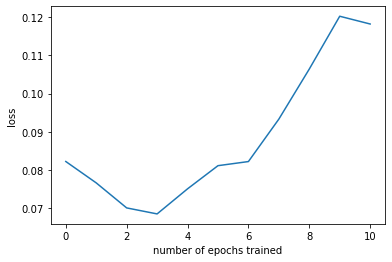

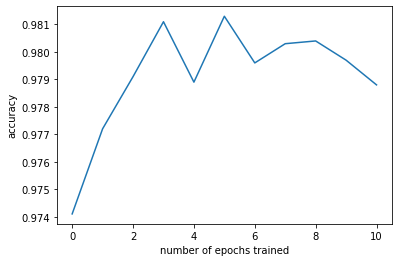

In [17]:
import matplotlib.pyplot as plt
models_loss = [model_results[i][0] for i in range(len(model_results))]
models_acc = [model_results[i][1] for i in range(len(model_results))]
plt.plot(models_loss)
plt.ylabel('loss')
plt.xlabel('number of epochs trained')
plt.show()
plt.plot(models_acc)
plt.ylabel('accuracy')
plt.xlabel('number of epochs trained')
plt.show()

### Change Networks Width and Depth

In [18]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [20]:
model_results = []
model_1.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model_1.fit(x_train, y_train, epochs=5)
model_results.append(model_1.evaluate(x_test,  y_test, verbose=2))

model_2.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model_2.fit(x_train, y_train, epochs=5)
model_results.append(model_2.evaluate(x_test,  y_test, verbose=2))

model_3.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model_3.fit(x_train, y_train, epochs=5)
model_results.append(model_3.evaluate(x_test,  y_test, verbose=2))

model_4.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model_4.fit(x_train, y_train, epochs=5)
model_results.append(model_4.evaluate(x_test,  y_test, verbose=2))



Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2583 - accuracy: 0.9265
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1129 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0774 - accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0587 - accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0437 - accuracy: 0.9866
313/313 - 0s - loss: 0.0829 - accuracy: 0.9757
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8263 - accuracy: 0.2485
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6488 - accuracy: 0.3310
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5835 - accuracy: 0.3559
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5677 - accuracy: 0.3616
Epoch 5/5
1875/1875 [=======================

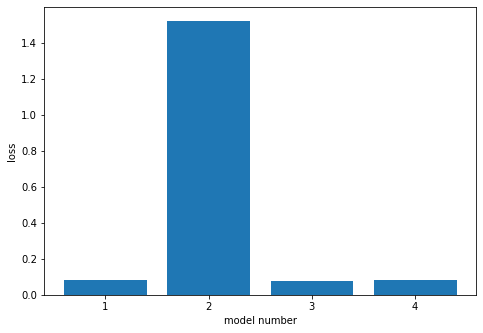

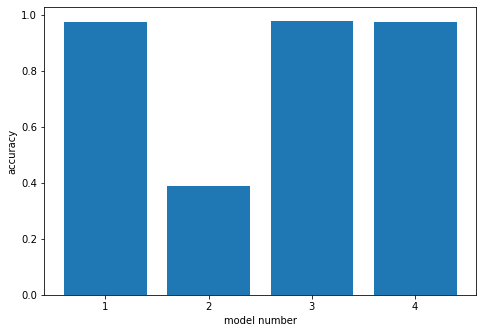

In [21]:
model_results
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['1', '2', '3', '4']
loss = [model_results[i][0] for i in range(len(model_results))]
ax.bar(models,loss)
ax.set_ylabel('loss')
ax.set_xlabel('model number')
plt.show()

fig_2 = plt.figure()
ax_2 = fig_2.add_axes([0,0,1,1])
acc = [model_results[i][1] for i in range(len(model_results))]
ax_2.bar(models,acc)
ax_2.set_ylabel('accuracy')
ax_2.set_xlabel('model number')
plt.show()

### OpenCV Sobel Detection

In [22]:
img0 = cv2.imread('giraffe.jpg')
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(gray,(3,3),0)
img = x_test[1]

# Changing second arguement to cv2.CV_64F, cv2.CV_16S and cv2.CV_8U
# Gotta play with this
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
img = np.sqrt(np.square(sobelx) + np.square(sobely))
sobelTest = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=5)
cv2.imshow('testBoth',sobelTest)
cv2.imshow('test',sobelx)
cv2.imshow('test',sobely)
cv2.imshow("total",img)
Hori = np.concatenate((sobelx, sobely), axis=1)
cv2.imshow('hori', Hori)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
def convert(data):
    new_data=[]
    for i in range(len(data)):
        img = data[i]
        sobelx = cv2.Sobel(np.float32(img),cv2.CV_64F,1,0,ksize=5)
        sobely = cv2.Sobel(np.float32(img),cv2.CV_64F,0,1,ksize=5)
        img2 = np.sqrt(np.square(sobelx) + np.square(sobely))
        new_data.append(sobely)
    return np.array(new_data)

In [24]:
x_test_new  = convert(x_test)
x_train_new = convert(x_train)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [27]:
model_results = []
model_1.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model_1.fit(x_train_new, y_train, epochs=5)
model_results.append(model_1.evaluate(x_test_new,  y_test, verbose=2))

model_2.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model_2.fit(x_train_new, y_train, epochs=5)
model_results.append(model_2.evaluate(x_test_new,  y_test, verbose=2))

model_3.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model_3.fit(x_train_new, y_train, epochs=5)
model_results.append(model_3.evaluate(x_test_new,  y_test, verbose=2))

model_4.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model_4.fit(x_train_new, y_train, epochs=5)
model_results.append(model_4.evaluate(x_test_new,  y_test, verbose=2))



Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6503 - accuracy: 0.9783
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5272 - accuracy: 0.9811
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4471 - accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4200 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3507 - accuracy: 0.9848
313/313 - 0s - loss: 1.4106 - accuracy: 0.9710
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2776 - accuracy: 0.5272
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1756 - accuracy: 0.5640
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1214 - accuracy: 0.5846
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0606 - accuracy: 0.6101
Epoch 5/5
1875/1875 [=======================

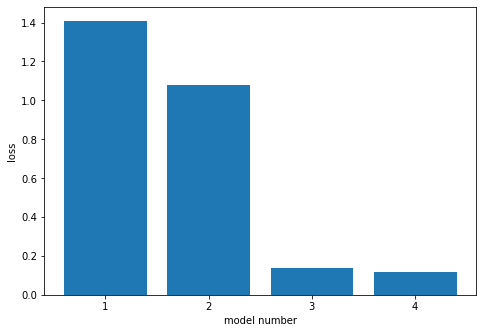

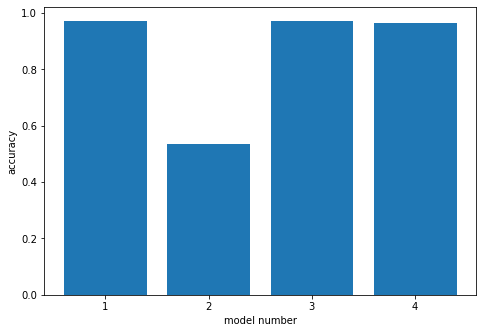

In [28]:
model_results
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['1', '2', '3', '4']
loss = [model_results[i][0] for i in range(len(model_results))]
ax.bar(models,loss)
ax.set_ylabel('loss')
ax.set_xlabel('model number')
plt.show()

fig_2 = plt.figure()
ax_2 = fig_2.add_axes([0,0,1,1])
acc = [model_results[i][1] for i in range(len(model_results))]
ax_2.bar(models,acc)
ax_2.set_ylabel('accuracy')
ax_2.set_xlabel('model number')
plt.show()